In [1]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\`Admin\\AppData\\Roaming\\Python\\Python39\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



In [2]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.1-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.1 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.1 which is incompatible.


In [4]:
import tensorflow

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
#from keras import regularizers
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [6]:
#load data set 
data = pd.read_csv('mnist_784_csv.csv')
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [12]:
train = pd.read_csv("mnist_784_csv.csv")
test = pd.read_csv("mnist_784_csv.csv")

In [13]:
#train.head() shows us the first five columns of a dataframe
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

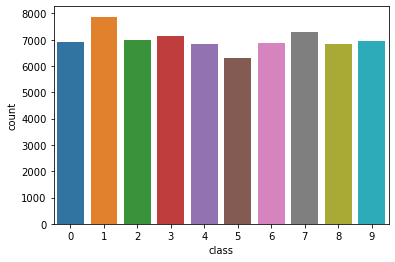

In [14]:
y_train = train["class"]
x_train = train.drop(labels = ["class"], axis = 1)


#sns.countplot will count the number of unique values in y_train and give us the distribution in the form of a graph
graph = sns.countplot(y_train)

y_train.value_counts()

In [15]:
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
#Data Normalization 
x_train = x_train.astype('float')/255.

In [18]:
# Splitting our data into training and testing
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [19]:
#Number of the samples we have
x_train_size = len(x_train)
x_val_size = len(x_val)

print(x_train_size)
print(x_val_size)

56000
14000


In [ ]:
#Adding Noise

In [20]:
x_train_noisy = x_train + np.random.rand(x_train_size, 784) * 0.9
x_val_noisy = x_val + np.random.rand(x_val_size, 784) * 0.9

#clipping the noise under 0 and 1 incase something went above
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

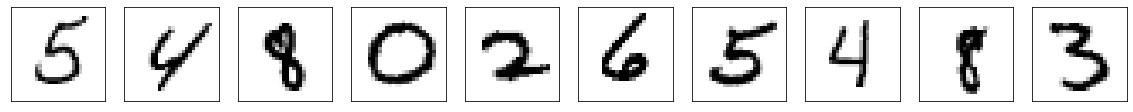

In [21]:
def plot(x, p , labels = False):
    plt.figure(figsize = (20,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(x[i].reshape(28,28), cmap = 'binary') #reshaping the to conver 784 to 28x28 for an image plotting
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return
plot(x_train, None)

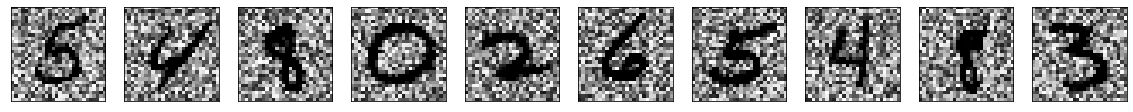

In [22]:
plot(x_train_noisy, None)

In [ ]:
#Building and Training a Classifier

In [23]:
classifier = Sequential([
    Dense(512, activation = 'relu', input_shape = (784, )),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#using spare_categorical_crossentropy because labels have not been encoded
classifier.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 798474 (3.05 MB)
Trainable params: 798474 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
classifier.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
110/110 [==============================] - 5s 19ms/step - loss: 0.3327 - accuracy: 0.9038
Epoch 2/10
110/110 [==============================] - 2s 20ms/step - loss: 0.1051 - accuracy: 0.9682
Epoch 3/10
110/110 [==============================] - 2s 17ms/step - loss: 0.0640 - accuracy: 0.9804
Epoch 4/10
110/110 [==============================] - 2s 17ms/step - loss: 0.0430 - accuracy: 0.9868
Epoch 5/10
110/110 [==============================] - 2s 17ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 6/10
110/110 [==============================] - 2s 20ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 7/10
110/110 [==============================] - 2s 21ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 8/10
110/110 [==============================] - 2s 20ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 9/10
110/110 [==============================] - 2s 17ms/step - loss: 0.0125 - accuracy: 0.9963
Epoch 10/10
110/110 [==============================] - 2s 17ms/step - loss: 0.0093 - accura

In [26]:
loss, acc = classifier.evaluate(x_val, y_val)

438/438 [==============================] - 1s 1ms/step - loss: 0.0856 - accuracy: 0.9794


In [27]:
loss, acc = classifier.evaluate(x_val_noisy, y_val)

438/438 [==============================] - 1s 1ms/step - loss: 9.7013 - accuracy: 0.2524


In [28]:
input_image = Input(shape = (784, ) )

encoded = Dense(512, activation = 'relu')(input_image)
encoded = Dense(512, activation = 'relu')(encoded)
encoded = Dense(256, activation = 'relu')(encoded)
encoded = Dense(256, activation = 'relu')(encoded)
encoded = Dense(64,  activation = 'relu')(encoded)

decoded = Dense(512, activation = 'relu')(encoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 512)               33280 

In [29]:
#Lambda callback willl print the val_loss after each epoch
from tensorflow.keras.callbacks import LambdaCallback

autoencoder.fit(x_train_noisy, x_train,
               epochs = 100, batch_size = 512,
               validation_split = 0.2, verbose = False,
               callbacks=[LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))]
               )

print("Training has finished !")

0.241 _ 0.197 _ 0.170 _ 0.157 _ 0.151 _ 0.143 _ 0.139 _ 0.133 _ 0.131 _ 0.127 _ 0.125 _ 0.122 _ 0.121 _ 0.119 _ 0.118 _ 0.116 _ 0.116 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.106 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.102 _ 0.102 _ 0.102 _ 0.101 _ 0.102 _ 0.101 _ 0.101 _ 0.101 _ 0.102 _ 0.100 _ 0.101 _ 0.100 _ 0.100 _ 0.101 _ 0.099 _ 0.099 _ 0.099 _ 0.099 _ 0.099 _ 0.099 _ 0.099 _ 0.099 _ 0.098 _ 0.098 _ 0.098 _ 0.098 _ 0.098 _ 0.098 _ 0.098 _ 0.098 _ 0.097 _ 0.097 _ 0.098 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.097 _ 0.096 _ 0.097 _ 0.096 _ 0.096 _ 0.097 _ 0.097 _ 0.096 _ 0.098 _ 0.096 _ 0.096 _ 0.095 _ 0.096 _ 0.096 _ 0.096 _ 0.096 _ 0.095 _ 0.096 _ 0.096 _ 0.096 _ 0.095 _ Training has finished !


In [ ]:
#Denoising Images

In [30]:
preds = autoencoder.predict(x_val_noisy)

438/438 [==============================] - 1s 3ms/step


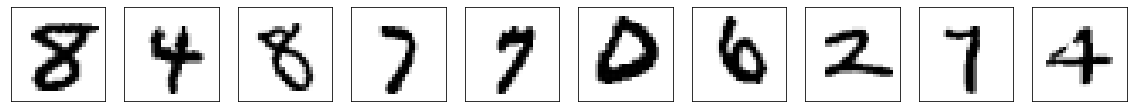

In [31]:
plot(x_val, None)

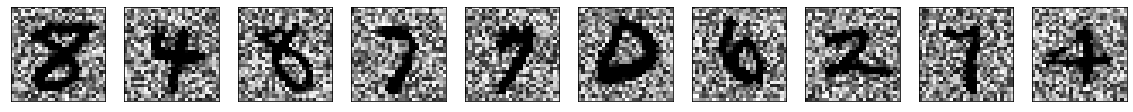

In [32]:
plot(x_val_noisy, None)

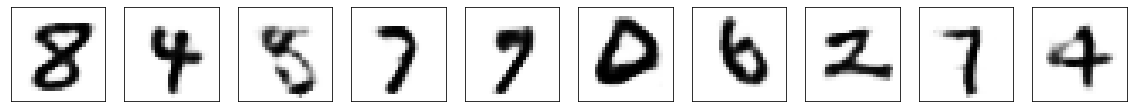

In [33]:
#plotting the denoised images
plot(preds, None)

In [34]:
loss, acc = classifier.evaluate(preds, y_val)
print(f"Loss : {loss} \nAccuracy : {acc}")

438/438 [==============================] - 1s 1ms/step - loss: 0.1536 - accuracy: 0.9657
Loss : 0.15358015894889832 
Accuracy : 0.9657142758369446
